The Objective of this kernel is to look at how to create & auto-update a dataset and a kernel using the Kaggle API and Google Cloud Platform (GCP).

The end result of this kernel is, it fetches the required data from the API, stores it in Google Cloud and is then pushed to kaggle using the Kaggle API. 
Lets see how it is done, step-by-step

## CONTENTS

1. [Setting up Google Cloud Platform](#gcp)
2. [Extracting the dataset](#ext)
3. [Storing it in GCP](#sto)
4. [Pushing it to Kaggle](#push)

<a id='gcp'></a>

# Setting up Google Cloud Platform

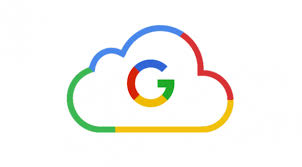

Google Cloud Platform, offered by Google, is a suite of cloud computing services that runs on the same infrastructure that Google uses internally for its end-user products, such as Google Search and YouTube. The cloud platform provides various services like AI & ML, Databases, API Management, Storage, IOT and much more. Here, in this kernel we will use the storage services as we need that to store data in order to push that into kaggle via the API.

GCP not only provides free credits upon sign-up, but also offers completely free tiers of computing and storage. You can also spin-up huge clusters of virtual machines, along with the services mentioned above for a fee. For more details, you may check https://cloud.google.com/

As with all services on the internet, the first step is to sign up for a google account if you don't have one and I am pretty sure the chances of you not having an account already is less. So, head to the [Platform](https://cloud.google.com/) and sign-in. You must see the **GET STARTED FOR FREE** button on the top right. It will take you to **STEP 1** of the process and there you choose the country. Clicking next will take you to **STEP 2** of the set up process and you will see options to set up your payments profile. 


WAIT, the page said **GET STARTED FOR FREE!!**

![](https://www.community-exchange.org/home/wp-content/uploads/2015/12/currency.jpg)

WHAAAT? I'M GONNA HAVE TO SPEND SOME MONEY FOR THIS? No Way! I am going to set up an account in https://www.pythonanywhere.com/ .... 

Now, before you think of alternatives, I'd suggest you check this link https://cloud.google.com/free/

Yes, you read that right. 300 dollars free credit to get started with any GCP product + 12 Months free access for any GCP Product and that is exactly what we will be using for our task. The Billing account you set up is for authentication and for services you use above the 300$ credit. So go ahead, enter the details and start your free trial. Also, keep an eye on the **billing** section of your account to ensure you don't cross the free credit limit.

Once you have the account ready, you will be asked to create a project. 

Basically, everything you do on GCP is associated with a GCP console project and therefore you will be asked to create a project first. You can go and either create it [here](https://console.cloud.google.com/cloud-resource-manager) or from the home page and once you create a project, your resource manager should look something like this.

![](https://github.com/rakash/images/blob/master/resource_manager.jpg?raw=true)
For the task in hand, all we need from GCP are the instances(Virtual Machines to run codes on) and of course, the storage. 

## Create an Instance

Compute Engine instances can run the public images for Linux and Windows Server that Google provides as well as private custom images that you can create or import from your existing systems. You can also deploy Docker containers, which are automatically launched on instances running the Container-Optimized OS public image.

You can choose the machine properties of your instances, such as the number of virtual CPUs and the amount of memory, by using a set of predefined machine types or by creating your own custom machine types.

Each instance belongs to a Google Cloud Platform Console project(as we talked about before), and a project can have one or more instances. When you create an instance in a project, you specify the zone, operating system, and machine type of that instance. When you delete an instance, it is removed from the project.


Now, on the bar on the left click compute engine followed by create instance. You will see a page like the one below. As you can see from the image and from your account as well(if you are doing it simultaneously), you are provided with a lot of options to choose the region, OS and the type of machine. 
Whatever I have chosen(as seen below) are part of the [free tier](https://cloud.google.com/compute/pricing) and accordingly the cost estimator on the right side will change. Keep an eye on that as you play with the options so you know how much you spend(well, not out of your pocket. Its free credits, remember?).

Once you select your choices, click Create. A Virtual machine is now created in your project. 

![](https://github.com/rakash/images/blob/master/instance.jpg?raw=true)

Clicking the **Compute Engine** at the top will take you to the instance page you created and must look something like this

![](https://github.com/rakash/images/blob/master/instance1.jpg?raw=true)

Note this as we will come to this page again in a few minutes, but before that we have to set up a storage bucket.

## Create a Bucket

In Cloud Storage, you create a bucket to store your data. A bucket has three properties that you specify when you create it: a globally unique name, a location where the bucket and its contents are stored, and a default storage class for objects added to the bucket.

Click those 3 horizontal lines you see next to Google Cloud Platform in the top-left, and then from the bar along the left click STORAGE, followed by CREATE BUCKET. You will see something like this

![](https://github.com/rakash/images/blob/master/bucket.jpg?raw=true)

Give it a name, which will be your bucket name(globally unique),  Storage class and the Location of your choice. You can read more about it [here](https://cloud.google.com/storage/docs/creating-buckets). Once you create it, you will see something like this


![](https://github.com/rakash/images/blob/master/bucket1.jpg?raw=true)

Is this the only way to create a storage bucket? 

No, it is not! There are multiple ways to create a storage bucket in google cloud and the method we have opted for is the [console](https://cloud.google.com/storage/docs/creating-buckets#storage-create-bucket-console) method, which is the easiest of all. There are other methods, one of which is [gsutil](https://cloud.google.com/storage/docs/creating-buckets#storage-create-bucket-gsutil) which we will see when we upload the data to the bucket.


Now, recall the instance we created a while ago? It is time we put that to use. 

Go back to the main console, click the 3 lines on the top left, then Click COMPUTE ENGINE to see your instance. Then, **click SSH under the connect header** to access shell. 

Tadaaa! You are under a Linux Machine and anything that's normally done in a linux shell can be done here. That said, we have to

    - Install Python 3 and the required libraries.
    - Install Kaggle API

By default all linux machines have python 2 and so did the VM(at least for my instance). So I went ahead with installing Python 3. Here is how you can do,

    sudo apt install python python-dev python3 python3-dev

To install the other dependencies/packages, we can first install Pip. what is pip? I am sure most of you know but briefly, [PIP](https://pypi.org/project/pip/) is a package management system used to install and manage software packages written in Python. To install PIP itself, go ahead and run both the commands as below in your shell.

    wget https://bootstrap.pypa.io/get-pip.py
    sudo python get-pip.py

Now you are set to install any python libraries using PIP. Its time to install kaggle API.

    sudo pip install kaggle
    
 
The [Kaggle API](https://github.com/Kaggle/kaggle-api) allows you to fully interact with Kaggle providing us everything we need to update our dataset and kernel. But kaggle has its own procedure **(think API credentials)** before we go ahead and access their platform.

    1) Go to your Kaggle account(top right click your picture and select my account) and click 'create new API token' under the API header. 
    2) Download and open the file, copy the contents of the json file.
    3) In your GCP shell, type nano kaggle.json. Paste the contents, then save and close the file.
    4) Finally, move this into the required folder with " mkdir .kaggle " and then move the json file to this folder by typing " mv kaggle.json .kaggle/ "
    5) Grant the required permissions using " chmod 600 /home/your_directory/.kaggle/kaggle.json " . your_directory would ideally be your email ID -> /home/<your email id>/.kaggle/kaggle.json

It is also advisable to install the requests library, if your data extraction is going to be written in Python. 

    sudo pip install -U requests

<a id='ext'></a>

# Extracting the dataset

Depending on your project or ask you can create a Python script that will fetch the data required(JSON or XML format) and store in a directory in the VM(instance) created. This is the process I followed for the task in hand, and then the instance would need the authorization to access your storage bucket. 

Once you have your script ready, you can run it by 

    python3 <script_name>.py
    
    Example - Python3 task.py
    
#### FEW LINES FROM THE ZOMATO DATA EXTRACTION PROGRAM(task.py)    

In [ ]:
"""
import requests
from requests.adapters import HTTPAdapter
from requests.packages.urllib3.util.retry import Retry

headers1={'user-key' : zomato_api_key}
read_rest=[]
rest_list=[]

def call_1(): 
    for i in range(1, 80):
        read_rest=[]
        try:
            rests_url=('https://developers.zomato.com/api/v2.1/search?entity_id='+str(i)+'&entity_type=city&start=101&count=20') # fetching the data from this url    
            get_request = requests.get(rests_url, headers=headers1)
            read_rest=json.loads(get_request.text) #loading the data fetched to an object
            rest_list.append(read_rest)
        except requests.exceptions.ConnectionError as r:
            r.status_code = "Connection refused"

"""

#### Authorise access to the bucket for our instance

I have a dedicated folder now with a bunch of JSON files(raw data). Now, I want to back these up to the storage bucket that I created. First, I need to give this instance permission to access the storage bucket. The below line of code does the job. 

    gcloud auth login
It will provide you with a set of instructions like

**Do you want to continue?(Y/n)? -  Select Y**

**Once you press Y and enter, you will get a URL. Go to the URL, copy the verification code and paste it in the shell. Done. You have now granted access to the bucket**

<a id='sto'></a>

# Storing it in GCP

We have extracted the data, have granted access to our instance for our bucket 

Its time to copy the raw files(JSON in this case) to the Bucket. Since there are a lot of files, its better to store them all into one tar.gz file and upload that. A tar.gz file often called a tarball, is a collection of files wrapped up in one single file for easy storage. Rather than keep track of a whole folder of files, you only need to keep track of one. Tar files are often compressed after being created, giving it the .tar.gz file extension.

    1) Create the tar file by running  " tar -zcvf all_data.tar.gz temp " 
     -- tar -zcvf is the command, all_data_tar.gz is the compressed file name and temp is the directory where all my raw files are stored in my instance
    
    2) Now,transfer to the bucket with " gsutil cp all_data.tar.gz gs://first_project_data_zomato/ " 
        - replace first_project_data_zomato with the name of your bucket
        
Remember we saw the methods to create a storage bucket and gsutil being one of the ways. We just put that to use. 

It is a useful tool for accessing GCP buckets and much more using the cloud SDK from the command line. You can read more [here](https://cloud.google.com/storage/docs/gsutil) and [here](https://cloud.google.com/sdk/docs/)

Now, the data is available both on the instance & in the bucket and we can go ahead and create the kaggle dataset right away. But the data in the bucket is not publicly available by default, which it needs to be if we want to use the Kaggle platform to create it. gsutil comes into play here again, 

Change the permission by running 

    gsutil acl ch -u AllUsers:R gs://first_project_data_zomato/all_data.tar.gz --> (change the bucket name and tar filename accordingly).

<a id='push'></a>

# Pushing to Kaggle

Now, we have an option of either letting kaggle platform update the dataset using the settings available in Kaggle or from the instance storage using the API. We will look at both the options and you may choose whichever best suits you. 


**OPTION 1 -  This option is preferred if your data is large and if you are planning on deactivating your instance most of the time. For this, you would ideally be running your script locally and for that you might need [Cloud SDK](https://cloud.google.com/sdk/docs/)**

 1) From the GCP console, go to STORAGE and then click on your bucket. You should see your newly uploaded tar.gz file and the 'Public access' column should be set to 'Public'. Next to the word 'Public', you should see a link symbol. Right click and select Copy link location (or equivalent in your browser of choice).
 
 
 ![](https://github.com/rakash/images/blob/master/kaggle.jpg?raw=true)
 
  
 2) Next, in Kaggle, go to Datasets followed by Create new dataset. Give it a title, and select the 'link' symbol (2nd from the list of symbols on the left). Paste the address of your GCP bucket file(the link you copied in the previous step) to the remote file text box and click add remote file.
 
 
 ![](https://github.com/rakash/images/blob/master/kaggle1.jpg?raw=true)
 
 
 The dataset is now being created...
  
 After the dataset is created, go to settings & select the update frequency of your choice. 
 
 
 **OPTION 2 - This is an option you can go for if you are in the free tier and if you do not want to run your extraction script on your machine and would need an instance.**
 
Just for the first time, create a directory and move the tar.gz file to the directory you created.

    mkdir <directory_name>
    mv <tar file> <directory_name>
    
Create a new Kaggle dataset first from the GCP Shell with
    
    kaggle datasets init -p /dataset_path(directory_name)  
    
 This will create a metadata JSON file in the corresponding directory. Go to this directory, and edit the file.
 You will see default values for the slug and title. Change these to the kernel URL name(In my case, it is https://www.kaggle.com/akashram/zomato-restaurants-autoupdated-dataset) and a title of your choice. Then, exit and change the permissions on the tar.gz file you are about to upload with
 
     chmod 777 <file_name>(In my case it is all_data.tar.gz)
 
 then go back to your home directory and type,
 
     kaggle datasets create -p /dataset_path(directory_name)

You should get the following message; 

    " Your private Dataset is being created. Please check progress at.... " 
    

We just created a dataset in kaggle using GCP! The Auto-updating part of it is what we will look at next

### Auto-updating

The Auto-updating part of this task is just a combination of Shell Script and a cron job.

If you have chosen **OPTION 1**, that is to let Kaggle update from your bucket, all you need to worry about is updating the bucket and your kernel.

Updating the bucket can done in many ways, write a script locally, use [cloud SDK](https://cloud.google.com/sdk/docs/) to update the bucket and let kaggle update based on the frequency you set. After the dataset is created, go to metadata and you should see a header named "updates", like you see below, click on edit and choose your option.

![](https://github.com/rakash/images/blob/master/freq.jpg?raw=true)


If you have chosen **OPTION 2(like the case here)** to update the dataset from the instance storage, you will also need to handle a few other things. 

Create a shell script "kaggle.sh" for example and have the below script in it(replace appropriate filenames, bucketnames etc..)


1) First, the shell script executes the Python script that gets the raw data. 

2) It then creates a tar.gz file and copies it to both the bucket (for backup or Kaggle auto-updates) as well as a folder on the instance. 

3) It also sets permission of the file on the bucket & then copy the tar file to the newly created directory


    #!/usr/bin/env bash

    python3 test.py
    tar -zcvf all_data.tar.gz <directory_name from the raw data script>
    gsutil cp all_data.tar.gz gs://<bucket_name>/
    gsutil acl ch -u AllUsers:R gs://<bucket_name>/all_data.tar.gz
    cp all_data.tar.gz <new_directory_name_to_copy_to_kaggle>/ 

4) A few second sleep and then update the dataset, 

    sleep 20s 

    kaggle datasets version -p ~/<new_directory_name_to_copy_to_kaggle> -m "Updated via API from Google Cloud"

5) A few second sleep and update the kernel

    sleep 60s
    
    kaggle kernels pull <kernel_slug> -m
    kaggle kernels push

### CRON JOB


Now that we have a script to do all the tasks, we need to schedule it. How do we do it? Since its a LINUX VM that this instance is on, cron jobs are a good option.

Whats cron? The software utility cron is a time-based job scheduler in Unix-like computer operating systems. People who set up and maintain software environments use cron to schedule jobs to run periodically at fixed times, dates, or intervals

But first, make the script executable with 

    chmod +x <shell_script_name> (In my case kaggle.sh). 

Next, create a cron job by typing 

    EDITOR="nano" crontab -e

In the file that opens, you set the timings in whatever format you'd like. you can read more [here](https://crontab.guru/examples.html)

Below is an example cron file that schedules at 12 every sunday.

In [ ]:
#!/usr/bin/env bash

## REMOVE THE COMMENTS(#)FROM ALL THE LINES AFTER THIS!


#SHELL=/bin/sh
#PATH=PATH=/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/home/akashram/

#0 0 * * SUN <path_to_file>  - /home/email_id/shell_script_filename

You can try and execute now to check if the process is successful. Type the below command in your shell.
    
        ./kaggle.sh 


Yes! Now your raw data is extracted, stored on your instance and on the google storage bucket and your kaggle dataset and kernel updates. All this every sunday at 12 AM! 



Hope you found this kernel useful. Please upvote if you liked it! Cheers.

##### Reference - @Rachael Tatman's Automating data pipelines Series & Dashboarding series